# Image Compression using a Sparse AutoEncoder

In [11]:
from keras.datasets import fashion_mnist
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from keras import regularizers


from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

# from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

### Autoencoder Model

#### Encoder part

In [0]:
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoded)
encoded = Dense(500, activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoded)
encoded = Dense(10, activation='sigmoid',activity_regularizer=regularizers.l1(10e-10))(encoded)

#### Decoder part

In [0]:
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

In [0]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### Model Summary

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
__________

In [0]:
encoder = Model(input_img, encoded)

In [19]:
autoencoder.compile(optimizer='adam', 
                    loss='mse')

W0819 14:31:12.496134 139755205625728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      min_delta=0, 
                                      patience=10, 
                                      verbose=1, 
                                      mode='auto')

train_history = autoencoder.fit(train_x, 
                                train_x, 
                                epochs=200, 
                                batch_size=2048, 
                                validation_data=(val_x, val_x), 
                                callbacks=[estop])

W0819 14:43:16.161781 139755205625728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0819 14:43:16.407409 139755205625728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 7s 109us/step - loss: 0.0918 - val_loss: 0.0679
Epoch 2/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0589 - val_loss: 0.0474
Epoch 3/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0426 - val_loss: 0.0386
Epoch 4/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0371 - val_loss: 0.0393
Epoch 5/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0340 - val_loss: 0.0318
Epoch 6/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0302 - val_loss: 0.0289
Epoch 7/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0274 - val_loss: 0.0259
Epoch 8/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.0253 - val_loss: 0.0246
Epoch 9/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.0240 - val_loss: 0.

### Predictions

In [0]:
pred = autoencoder.predict(val_x)

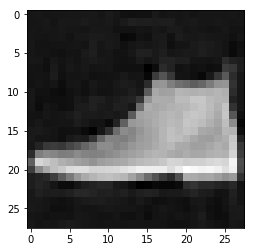

In [22]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

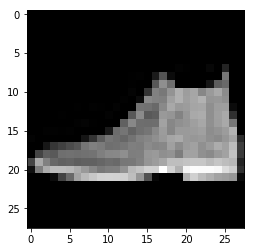

In [23]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

This model performs almost similar to the vanilla autoencoder like in the image_reconstruction notebook. But on inspecting the output of the encoder model, we can see that it uses much more sparse information to represent the original image.